## Problem Statement: <br>
We are a newly established travel company "Travel_Anywhere.com". The company is willing to launch its new product and wants to analyze the previous approach and attraction of the audience to rectify the same in its new launch. The current packages which we offer to our customers are as follows:-  Basic, Standard, Deluxe, Super Deluxe and King. Thus by analysis we are eager to increase our customer attraction. As last year we were able to plan travels for only 45% of approached customers. Also, we need to look deep into customer needs so that we can apply the same in our newly launched plan.| <br>
1) Which age group should we target first.<br>
2) What is the preferred Hotel of our customer?<br>
3) Should we target people who are having large business?<br>
4) In which of the products are males or females interested and did they actually buy it?<br>
To solve this business problem we are using data visualization techniques and deep learning models. Where we will use countplot,catplot to visualize our data and Binary classification to segregate our customer.The result of the model will be displayed using the accuracy of the model. The model accuracy will be the deciding factor for the project evaluation, by accurately classifying weather the customer will purchase our travel plan or not.

<br>
Dataset:- https://www.kaggle.com/code/dorianvoydie/eda-modelling-holiday-package-89-acc/input

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import LeakyReLU, PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout
import tensorflow as tf
import keras
import warnings
warnings.filterwarnings("ignore")

## Read Data

In [2]:
travel_data = pd.read_csv("Travel.csv")
travel_data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


Checking is the data have a null values

## Data Preprocessing

In [3]:
travel_data.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [4]:
travel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

As we can see few of the variables don't have a correct data type.<br>
Changing the data types to<br>
Age - int<br>
DurationOfPitch - int<br>
NumberOfFollowups - int <br>
PreferredPropertyStar - int <br>
NumberOfTrips - int<br>
NumberOfChildrenVisiting -int


In [5]:
travel_data = travel_data.dropna()
travel_data.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

We are dropping the na values as the null varlue rate is not too much

Data type changed

In [6]:
change_int = ["Age","DurationOfPitch","NumberOfFollowups","PreferredPropertyStar","NumberOfTrips","NumberOfChildrenVisiting"]
travel_data[change_int] = travel_data[change_int].astype(int)
travel_data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41,Self Enquiry,3,6,Salaried,Female,3,3,Deluxe,3,Single,1,1,2,1,0,Manager,20993.0
1,200001,0,49,Company Invited,1,14,Salaried,Male,3,4,Deluxe,4,Divorced,2,0,3,1,2,Manager,20130.0
2,200002,1,37,Self Enquiry,1,8,Free Lancer,Male,3,4,Basic,3,Single,7,1,3,0,0,Executive,17090.0
3,200003,0,33,Company Invited,1,9,Salaried,Female,2,3,Basic,3,Divorced,2,1,5,1,1,Executive,17909.0
5,200005,0,32,Company Invited,1,8,Salaried,Male,3,3,Basic,3,Single,1,0,5,1,1,Executive,18068.0


Dropping Cutsomer id

In [7]:
travel_data.drop("CustomerID",axis=1,inplace=True)
travel_data.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41,Self Enquiry,3,6,Salaried,Female,3,3,Deluxe,3,Single,1,1,2,1,0,Manager,20993.0
1,0,49,Company Invited,1,14,Salaried,Male,3,4,Deluxe,4,Divorced,2,0,3,1,2,Manager,20130.0
2,1,37,Self Enquiry,1,8,Free Lancer,Male,3,4,Basic,3,Single,7,1,3,0,0,Executive,17090.0
3,0,33,Company Invited,1,9,Salaried,Female,2,3,Basic,3,Divorced,2,1,5,1,1,Executive,17909.0
5,0,32,Company Invited,1,8,Salaried,Male,3,3,Basic,3,Single,1,0,5,1,1,Executive,18068.0


## Data Visualization

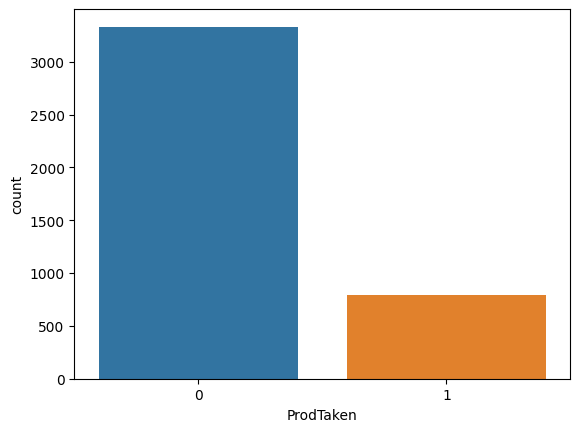

In [8]:
sns.countplot(x = travel_data["ProdTaken"] )
plt.show()

As we can see the value of taken is more than not-taken therefore our data is imbalanced and we have to resample it

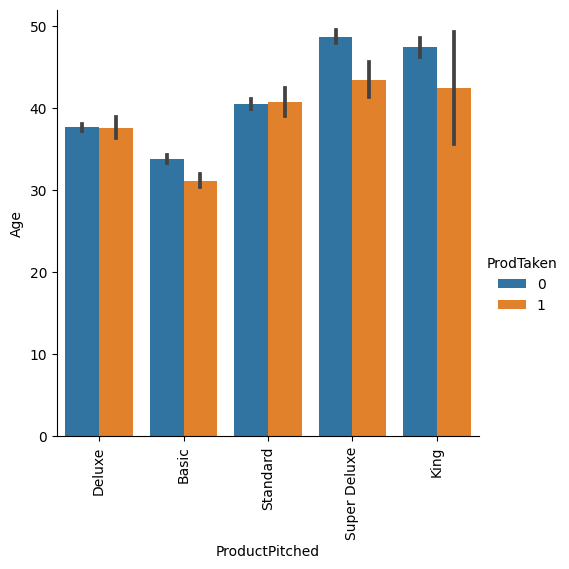

In [9]:
sns.catplot(x="ProductPitched", y="Age", hue="ProdTaken", kind="bar", data=travel_data)
plt.xticks(rotation=90)
plt.show()

Pleople in range from 25 - 37 are more prone to take our holiday package

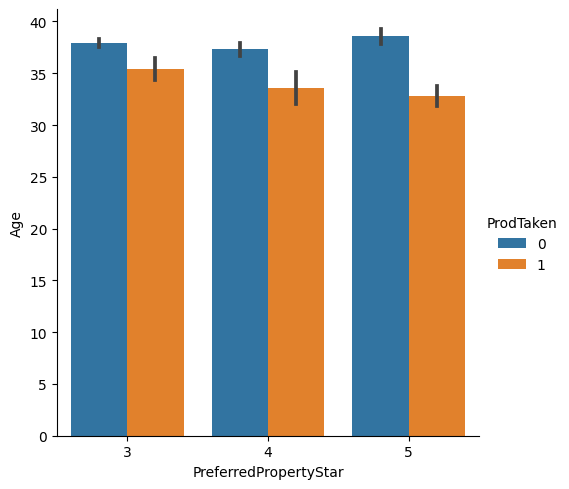

In [10]:
sns.catplot(x="PreferredPropertyStar", y="Age", hue="ProdTaken", kind="bar", data=travel_data)
plt.show()

Customer who are likely to come from the self enquirey are more intrested in our package than that of the company invited customer

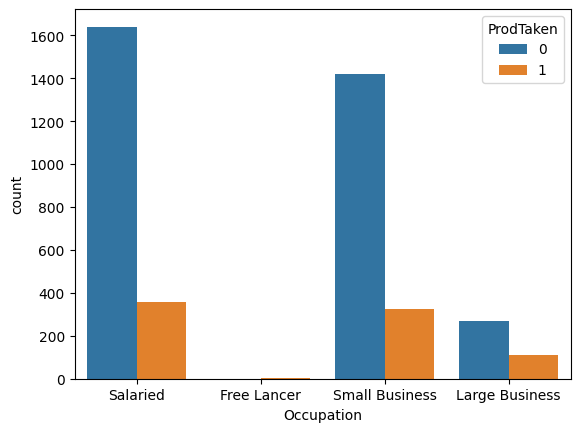

In [11]:
sns.countplot(x="Occupation", hue="ProdTaken",  data=travel_data)
plt.show()


Our target audience should be people who are either salaried or having small business

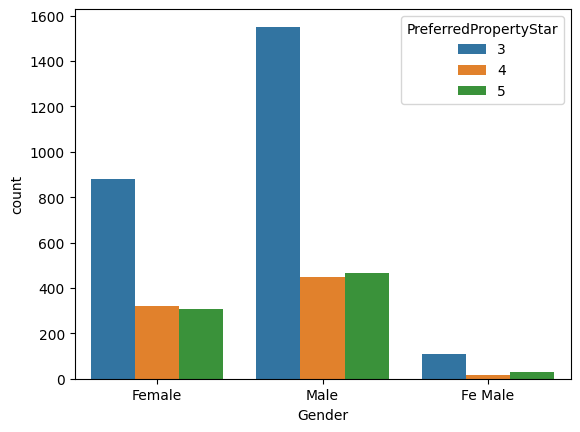

In [12]:
sns.countplot(x = "Gender",hue = "PreferredPropertyStar",data = travel_data)
plt.show()

## Data Preparation

Converting charecter data using label encoder

In [13]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
char_col = ["TypeofContact","Occupation","Gender","ProductPitched","MaritalStatus","Designation"]
for i in char_col:
  travel_data[i] = lb.fit_transform(travel_data[i].astype(str))
travel_data.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41,1,3,6,2,1,3,3,1,3,2,1,1,2,1,0,2,20993.0
1,0,49,0,1,14,2,2,3,4,1,4,0,2,0,3,1,2,2,20130.0
2,1,37,1,1,8,0,2,3,4,0,3,2,7,1,3,0,0,1,17090.0
3,0,33,0,1,9,2,1,2,3,0,3,0,2,1,5,1,1,1,17909.0
5,0,32,0,1,8,2,2,3,3,0,3,2,1,0,5,1,1,1,18068.0


In [14]:
travel_data.describe()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
count,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.0000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000
mean,0.193072,37.231831,0.706880,1.663275,15.584787,2.329700,1.559109,2.949370,3.741521,1.172723,3.578488,1.300872,3.2953,0.295300,3.060804,0.612161,1.223595,1.716570,23178.464147
std,0.394757,9.174521,0.455248,0.920640,8.398142,0.639216,0.567169,0.718818,1.006786,1.283041,0.795031,0.960867,1.8563,0.456233,1.363064,0.487317,0.852685,0.912502,4506.614622
min,0.000000,18.000000,0.000000,1.000000,5.000000,0.000000,0.000000,1.000000,1.000000,0.000000,3.000000,0.000000,1.0000,0.000000,1.000000,0.000000,0.000000,0.000000,1000.000000
25%,0.000000,31.000000,0.000000,1.000000,9.000000,2.000000,1.000000,2.000000,3.000000,0.000000,3.000000,1.000000,2.0000,0.000000,2.000000,0.000000,1.000000,1.000000,20751.000000
50%,0.000000,36.000000,1.000000,1.000000,14.000000,2.000000,2.000000,3.000000,4.000000,1.000000,3.000000,1.000000,3.0000,0.000000,3.000000,1.000000,1.000000,2.000000,22418.000000
75%,0.000000,43.000000,1.000000,3.000000,20.000000,3.000000,2.000000,3.000000,4.000000,2.000000,4.000000,2.000000,4.0000,1.000000,4.000000,1.000000,2.000000,2.000000,25301.000000
max,1.000000,61.000000,1.000000,3.000000,127.000000,3.000000,2.000000,5.000000,6.000000,4.000000,5.000000,3.000000,22.0000,1.000000,5.000000,1.000000,3.000000,4.000000,98678.000000


splitting independent and dependent variable

In [15]:
X = travel_data.iloc[:, 1:19]
y = travel_data["ProdTaken"]
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,41,1,3,6,2,1,3,3,1,3,2,1,1,2,1,0,2,20993.0
1,49,0,1,14,2,2,3,4,1,4,0,2,0,3,1,2,2,20130.0
2,37,1,1,8,0,2,3,4,0,3,2,7,1,3,0,0,1,17090.0
3,33,0,1,9,2,1,2,3,0,3,0,2,1,5,1,1,1,17909.0
5,32,0,1,8,2,2,3,3,0,3,2,1,0,5,1,1,1,18068.0


Balancing the data using resampling

In [16]:
re = RandomUnderSampler()
X_re,y_re = re.fit_resample(X,y)
X_re.shape

(1594, 18)

Train test split

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X_re,y_re,test_size=0.2)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.1)

Scaling the data with standard scalar

In [18]:
scale_val = ["Age","DurationOfPitch","NumberOfTrips","MonthlyIncome"]
scale = StandardScaler()
X_train[scale_val] = scale.fit_transform(X_train[scale_val])
X_val[scale_val] = scale.transform(X_val[scale_val])
X_test[scale_val] = scale.transform(X_test[scale_val])

In [19]:
X_train.shape
y_train.shape

(1147,)

## Traning Model

adding early stopping

In [20]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor = "val_loss",mode="auto",patience=20,baseline = None,restore_best_weights=False)

1)Model 1

In [43]:
model1 = Sequential()
model1.add(Dense(units = 24, input_shape = (18,),activation = "relu"))
model1.add(Dense(units = 15, activation = "relu"))
model1.add(Dense(units = 9,activation="relu"))
model1.add(Dense(units = 2,activation = "sigmoid"))
model1.add(Flatten())
model1.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["binary_accuracy"])
model1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 24)                456       
                                                                 
 dense_29 (Dense)            (None, 15)                375       
                                                                 
 dense_30 (Dense)            (None, 9)                 144       
                                                                 
 dense_31 (Dense)            (None, 2)                 20        
                                                                 
 flatten_7 (Flatten)         (None, 2)                 0         
                                                                 
Total params: 995 (3.89 KB)
Trainable params: 995 (3.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
model_hist1 = model1.fit(X_train,y_train,epochs = 500,validation_data=(X_val,y_val),batch_size=25,callbacks=early_stop)

Epoch 1/500
46/46 [==============================] - 2s 11ms/step - loss: 0.7003 - binary_accuracy: 0.5475 - val_loss: 0.6641 - val_binary_accuracy: 0.5938
Epoch 2/500
46/46 [==============================] - 0s 5ms/step - loss: 0.6587 - binary_accuracy: 0.6116 - val_loss: 0.6429 - val_binary_accuracy: 0.6523
Epoch 3/500
46/46 [==============================] - 0s 6ms/step - loss: 0.6363 - binary_accuracy: 0.6443 - val_loss: 0.6289 - val_binary_accuracy: 0.6875
Epoch 4/500
46/46 [==============================] - 0s 6ms/step - loss: 0.6213 - binary_accuracy: 0.6543 - val_loss: 0.6221 - val_binary_accuracy: 0.6719
Epoch 5/500
46/46 [==============================] - 0s 6ms/step - loss: 0.6062 - binary_accuracy: 0.6739 - val_loss: 0.6140 - val_binary_accuracy: 0.6719
Epoch 6/500
46/46 [==============================] - 0s 5ms/step - loss: 0.5929 - binary_accuracy: 0.6944 - val_loss: 0.6047 - val_binary_accuracy: 0.6797
Epoch 7/500
46/46 [==============================] - 0s 3ms/step - lo

2)Model 2

In [23]:
model2 = Sequential()
model2.add(Dense(units = 26, input_shape = (18,),activation = "relu"))
model2.add(Dense(units = 15,activation = keras.layers.LeakyReLU(alpha=0.03)))
model2.add(Dropout(0.25))
model2.add(Dense(units = 8,activation="relu"))
model2.add(Dense(units = 2,activation = "sigmoid"))
model2.add(Flatten())

model2.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["binary_accuracy"])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 26)                494       
                                                                 
 dense_5 (Dense)             (None, 15)                405       
                                                                 
 dropout (Dropout)           (None, 15)                0         
                                                                 
 dense_6 (Dense)             (None, 8)                 128       
                                                                 
 dense_7 (Dense)             (None, 2)                 18        
                                                                 
 flatten_1 (Flatten)         (None, 2)                 0         
                                                                 
Total params: 1045 (4.08 KB)
Trainable params: 1045 (4

In [24]:
model_hist2 = model2.fit(X_train,y_train, epochs = 500, validation_data=(X_val,y_val), batch_size=35, callbacks=early_stop)

Epoch 1/500
33/33 [==============================] - 1s 9ms/step - loss: 0.7478 - binary_accuracy: 0.5035 - val_loss: 0.6982 - val_binary_accuracy: 0.5312
Epoch 2/500
33/33 [==============================] - 0s 4ms/step - loss: 0.6893 - binary_accuracy: 0.5375 - val_loss: 0.6879 - val_binary_accuracy: 0.5703
Epoch 3/500
33/33 [==============================] - 0s 5ms/step - loss: 0.6809 - binary_accuracy: 0.5754 - val_loss: 0.6850 - val_binary_accuracy: 0.6016
Epoch 4/500
33/33 [==============================] - 0s 6ms/step - loss: 0.6759 - binary_accuracy: 0.5841 - val_loss: 0.6820 - val_binary_accuracy: 0.6016
Epoch 5/500
33/33 [==============================] - 0s 7ms/step - loss: 0.6742 - binary_accuracy: 0.5942 - val_loss: 0.6792 - val_binary_accuracy: 0.6094
Epoch 6/500
33/33 [==============================] - 0s 7ms/step - loss: 0.6652 - binary_accuracy: 0.6177 - val_loss: 0.6766 - val_binary_accuracy: 0.6133
Epoch 7/500
33/33 [==============================] - 0s 6ms/step - los

3)Model3

In [25]:
model3 = Sequential()
model3.add(Dense(units = 26, input_shape = (18,),activation = "relu"))
model3.add(Dense(units = 15,activation=keras.layers.LeakyReLU(alpha = 0.03)))
model3.add(Dense(units = 7, activation = keras.layers.LeakyReLU(alpha = 0.03)))
model3.add(Dense(units = 2,activation = "sigmoid"))
model3.add(Flatten())

model3.compile(loss = "binary_crossentropy", optimizer = "rmsprop", metrics = ["binary_accuracy"])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 26)                494       
                                                                 
 dense_9 (Dense)             (None, 15)                405       
                                                                 
 dense_10 (Dense)            (None, 7)                 112       
                                                                 
 dense_11 (Dense)            (None, 2)                 16        
                                                                 
 flatten_2 (Flatten)         (None, 2)                 0         
                                                                 
Total params: 1027 (4.01 KB)
Trainable params: 1027 (4.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
model_hist3 = model3.fit(X_train,y_train, epochs = 500, validation_data=(X_val,y_val), batch_size=25, callbacks=early_stop)

Epoch 1/500
46/46 [==============================] - 2s 11ms/step - loss: 0.7100 - binary_accuracy: 0.5126 - val_loss: 0.6822 - val_binary_accuracy: 0.5469
Epoch 2/500
46/46 [==============================] - 0s 4ms/step - loss: 0.6739 - binary_accuracy: 0.5584 - val_loss: 0.6611 - val_binary_accuracy: 0.5664
Epoch 3/500
46/46 [==============================] - 0s 5ms/step - loss: 0.6559 - binary_accuracy: 0.6129 - val_loss: 0.6442 - val_binary_accuracy: 0.6133
Epoch 4/500
46/46 [==============================] - 0s 4ms/step - loss: 0.6421 - binary_accuracy: 0.6534 - val_loss: 0.6316 - val_binary_accuracy: 0.6719
Epoch 5/500
46/46 [==============================] - 0s 3ms/step - loss: 0.6298 - binary_accuracy: 0.6853 - val_loss: 0.6141 - val_binary_accuracy: 0.6953
Epoch 6/500
46/46 [==============================] - 0s 3ms/step - loss: 0.6163 - binary_accuracy: 0.6888 - val_loss: 0.6161 - val_binary_accuracy: 0.7227
Epoch 7/500
46/46 [==============================] - 0s 3ms/step - lo

4)Model4

In [27]:
model4 = Sequential()
model4.add(Dense(units = 24, input_shape = (18,),activation = "relu"))
model4.add(Dense(units = 15,activation=keras.layers.LeakyReLU(alpha = 0.03)))
model4.add(Dense(units = 7, activation = keras.layers.LeakyReLU(alpha = 0.03)))
model4.add(Dense(units = 2,activation = "sigmoid"))
model4.add(Flatten())

model4.compile(loss = "binary_crossentropy",optimizer = "rmsprop", metrics = ["binary_accuracy"])
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 24)                456       
                                                                 
 dense_13 (Dense)            (None, 15)                375       
                                                                 
 dense_14 (Dense)            (None, 7)                 112       
                                                                 
 dense_15 (Dense)            (None, 2)                 16        
                                                                 
 flatten_3 (Flatten)         (None, 2)                 0         
                                                                 
Total params: 959 (3.75 KB)
Trainable params: 959 (3.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
model_hist4 = model4.fit(X_train,y_train,epochs = 500,validation_data=(X_val,y_val),batch_size=25,callbacks=early_stop)

Epoch 1/500
46/46 [==============================] - 1s 7ms/step - loss: 0.6812 - binary_accuracy: 0.5667 - val_loss: 0.6673 - val_binary_accuracy: 0.6055
Epoch 2/500
46/46 [==============================] - 0s 3ms/step - loss: 0.6521 - binary_accuracy: 0.6203 - val_loss: 0.6458 - val_binary_accuracy: 0.6602
Epoch 3/500
46/46 [==============================] - 0s 3ms/step - loss: 0.6375 - binary_accuracy: 0.6321 - val_loss: 0.6381 - val_binary_accuracy: 0.6289
Epoch 4/500
46/46 [==============================] - 0s 3ms/step - loss: 0.6269 - binary_accuracy: 0.6491 - val_loss: 0.6338 - val_binary_accuracy: 0.6719
Epoch 5/500
46/46 [==============================] - 0s 3ms/step - loss: 0.6158 - binary_accuracy: 0.6617 - val_loss: 0.6150 - val_binary_accuracy: 0.6875
Epoch 6/500
46/46 [==============================] - 0s 3ms/step - loss: 0.6069 - binary_accuracy: 0.6709 - val_loss: 0.6104 - val_binary_accuracy: 0.6719
Epoch 7/500
46/46 [==============================] - 0s 3ms/step - los

5)Model 5

In [29]:
model5 = Sequential()
model5.add(Dense(units = 26, input_shape = (18,),activation = keras.layers.LeakyReLU(alpha = 0.03)))
model5.add(Dense(units = 18,activation=keras.layers.LeakyReLU(alpha = 0.03)))
model5.add(Dense(units = 9, activation = keras.layers.LeakyReLU(alpha = 0.03)))
model5.add(Dense(units = 2,activation = "sigmoid"))
model5.add(Flatten())

model5.compile(loss = "binary_crossentropy",optimizer = "rmsprop", metrics = ["binary_accuracy"])
model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 26)                494       
                                                                 
 dense_17 (Dense)            (None, 18)                486       
                                                                 
 dense_18 (Dense)            (None, 9)                 171       
                                                                 
 dense_19 (Dense)            (None, 2)                 20        
                                                                 
 flatten_4 (Flatten)         (None, 2)                 0         
                                                                 
Total params: 1171 (4.57 KB)
Trainable params: 1171 (4.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
model_hist5 = model5.fit(X_train,y_train,epochs = 500,validation_data=(X_val,y_val),batch_size=25,callbacks=early_stop)

Epoch 1/500
46/46 [==============================] - 1s 9ms/step - loss: 0.6767 - binary_accuracy: 0.5815 - val_loss: 0.6877 - val_binary_accuracy: 0.5703
Epoch 2/500
46/46 [==============================] - 0s 4ms/step - loss: 0.6537 - binary_accuracy: 0.6255 - val_loss: 0.6606 - val_binary_accuracy: 0.6211
Epoch 3/500
46/46 [==============================] - 0s 3ms/step - loss: 0.6375 - binary_accuracy: 0.6530 - val_loss: 0.6385 - val_binary_accuracy: 0.6680
Epoch 4/500
46/46 [==============================] - 0s 3ms/step - loss: 0.6247 - binary_accuracy: 0.6726 - val_loss: 0.6228 - val_binary_accuracy: 0.7070
Epoch 5/500
46/46 [==============================] - 0s 3ms/step - loss: 0.6151 - binary_accuracy: 0.6748 - val_loss: 0.6035 - val_binary_accuracy: 0.7109
Epoch 6/500
46/46 [==============================] - 0s 3ms/step - loss: 0.6048 - binary_accuracy: 0.6901 - val_loss: 0.6011 - val_binary_accuracy: 0.7188
Epoch 7/500
46/46 [==============================] - 0s 3ms/step - los

Graph plotting

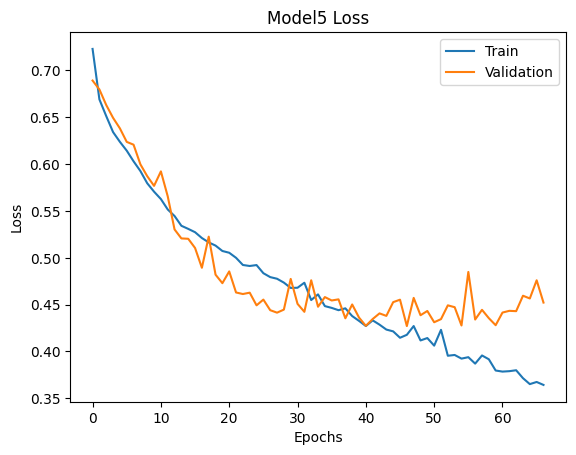

In [36]:
plt.plot(model_hist1.history["loss"])
plt.plot(model_hist1.history["val_loss"])
plt.title("Model5 Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["Train","Validation"],loc = "upper right")
plt.show()

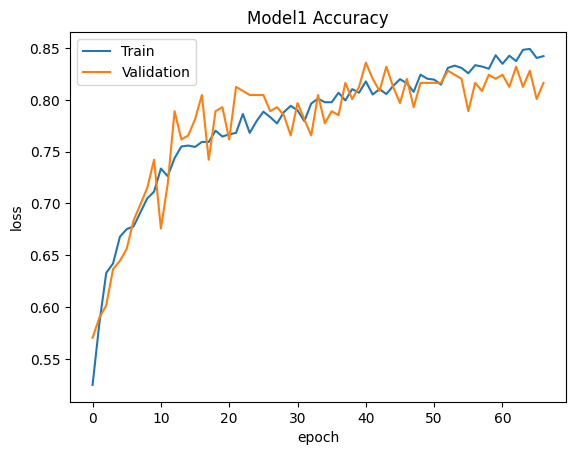

In [37]:
plt.plot(model_hist1.history["binary_accuracy"])
plt.plot(model_hist1.history["val_binary_accuracy"])
plt.title("Model1 Accuracy")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["Train","Validation"],loc = "upper left")
plt.show()

## Evaluation with the test data

In [38]:
hist_test = model1.evaluate(X_test,y_test)

10/10 [==============================] - 0s 10ms/step - loss: 0.5715 - binary_accuracy: 0.7649


In [39]:
print("Accuracy of Test : ", hist_test[1])
print("Loss of Test : ",hist_test[0])

Accuracy of Test :  0.7648902535438538
Loss of Test :  0.5715466737747192


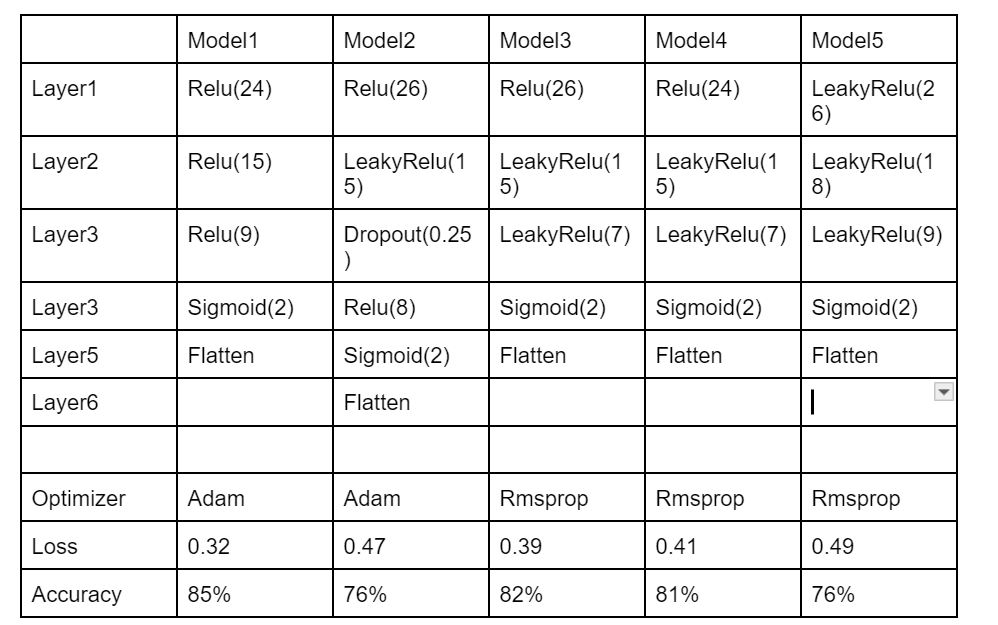

## Conclusion: <br>
As we can see Our model gives a accuracy approximately **80%** which is good with a loss of **0.52**. The model used 1 input layer, 2 Dense layer with Relu activation function, 1 output layer with sigmoid activation function as its a binary classification and one flatten layer to convert multidimensional array to flatten one dimensional array. We are selecting binary_cross_entropy as our loss function and optimizer as adam because its convergence rate is faster and it update the weights during training, the metrics used to calculate accuracy of model is **binary_accuracy** as it gives the percentage of predicted value which matches with the actual value.

## Recommendation: <br>
1) Our targeted customer should be most likely between age group 35 - 50.<br>
2) The audience preferred a 3 stars hotel over 4 and 5 stars hotel.<br>
3) Customers having small businesses or if they are employed then they are more interested in purchasing our travel plan.<br>
4) Both males and females are interested in the Deluxe and King type of property.<br>

## Limitations:<br>
1) We should try to get more accurate data to increase the accuracy at least up-to 90%<br>
2) We can thrive to decrease or loss.


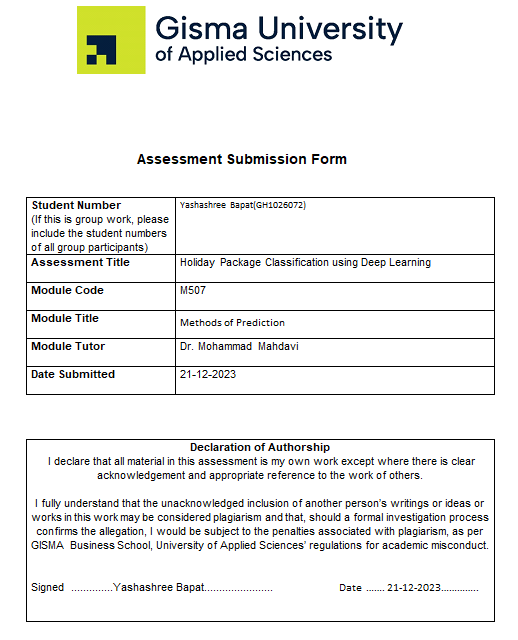